## Import Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime as dt, timedelta

## Load Data

The dataset is made up of four seperate csv files. The data was downloaded as csv files from multiple sources. In-game stats and attendance data comes from [Baseball Reference League Index](https://www.baseball-reference.com/leagues/). Information on ticket prices comes from the Economic History Association's [The Economic History of Major League Baseball](https://eh.net/encyclopedia/the-economic-history-of-major-league-baseball/) and [Average ticket price in Major League Baseball 2006-2020](https://www.statista.com/statistics/193426/average-ticket-price-in-the-mlb-since-2006/). Data from the last two sources was compiled by hand using Excel before loading as a pandas DataFrame below:

In [2]:
bat = pd.read_excel('data/sportsref_batting_avg.xls', index_col='Year')
pitch = pd.read_excel('data/sportsref_pitching_avg.xls', index_col='Year')
misc = pd.read_csv('data/misc.csv', index_col='Year')
cost = pd.read_csv('data/ticket-prices.tsv', sep='\t', index_col='year')
bat.head()

,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
Year,,,,,,,,,,,,,,,,,,,,,
1871,9,115,23.8,10.47,254,44.15,42.61,10.47,12.21,1.71,...,0.287,0.312,0.384,0.695,16.35,0.29,NaN,NaN,NaN,NaN
1872,11,143,23.4,9.26,366,43.52,42.80,9.26,12.20,1.59,...,0.285,0.297,0.348,0.645,14.89,0.27,NaN,NaN,NaN,NaN
1873,9,122,24.0,8.99,398,43.45,42.61,8.99,12.38,1.43,...,0.290,0.304,0.357,0.661,15.22,0.31,NaN,NaN,NaN,NaN
1874,8,120,25.0,7.48,464,41.69,41.17,7.48,11.26,1.37,...,0.273,0.282,0.333,0.616,13.72,0.23,NaN,NaN,NaN,NaN
1875,13,188,24.7,6.14,690,39.25,38.89,6.14,9.87,1.22,...,0.254,0.261,0.310,0.571,12.05,0.21,NaN,NaN,NaN,NaN


In [3]:
pitch.head()

,Tms,#P,PAge,R/G,ERA,G,GF,CG,SHO,tSho,...,BF,ERA+,WHIP,BAbip,H9,HR9,BB9,SO9,SO/W,E
Year,,,,,,,,,,,,,,,,,,,,,
2021,30,699,28.9,4.40,4.10,2316,0.99,0.01,0.01,0.07,...,37.24,NaN,1.277,0.289,8.1,1.2,3.4,9.2,2.70,0.57
2020,30,735,28.3,4.65,4.44,1796,0.98,0.02,0.01,0.06,...,37.03,NaN,1.327,0.292,8.4,1.3,3.5,9.1,2.56,0.58
2019,30,831,28.4,4.83,4.49,4858,0.99,0.01,0.01,0.06,...,38.39,NaN,1.334,0.298,8.7,1.4,3.3,8.9,2.69,0.60
2018,30,799,28.4,4.45,4.14,4862,0.99,0.01,0.00,0.06,...,38.08,NaN,1.304,0.295,8.5,1.2,3.2,8.5,2.63,0.57
2017,30,755,28.5,4.65,4.35,4860,0.99,0.01,0.01,0.05,...,38.13,NaN,1.342,0.300,8.8,1.3,3.3,8.3,2.53,0.58


In [4]:
misc.head(10)

,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
Year,,,,,,,,,,,,,,,,,,,
2021,30,1051,3:09,3:08,99.0,9.42,8.86,74.5,3.92,10.3,4.30,1.15,0.13,20.7,23.3,13274115.0,12629.0,$3566884893,$118896163
2020,30,898,3:06,3:07,68.0,7.57,9.29,74.0,3.97,10.4,4.43,0.65,0.23,20.7,25.7,NaN,NaN,NaN,NaN
2019,30,2429,3:10,3:05,208.0,8.56,9.66,76.8,3.93,10.3,4.41,1.18,0.14,24.9,31.0,68506896.0,28203.0,$3999827072,$133327569
2018,30,2431,3:04,3:00,216.0,8.89,8.90,76.1,3.90,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903,$132136563
2017,30,2430,3:08,3:05,182.0,7.49,9.29,76.2,3.89,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634,$132796421
2016,30,2428,3:04,3:00,185.0,7.62,8.96,76.0,3.88,10.4,4.15,1.12,0.16,24.2,27.5,73159044.0,30131.0,$3761011880,$125367062
2015,30,2429,3:00,2:56,212.0,8.73,8.50,75.6,3.83,10.4,4.11,1.16,0.18,24.5,27.0,73719340.0,30349.0,$3680887206,$122696240
2014,30,2430,3:07,3:02,232.0,9.55,8.13,75.7,3.83,10.3,3.98,1.14,0.17,24.8,24.8,73739622.0,30345.0,$3398869156,$113295638
2013,30,2431,3:04,2:58,243.0,10.00,8.33,76.0,3.84,10.3,3.95,1.12,0.17,24.5,24.2,74027037.0,30451.0,$3150727861,$105024262


In [5]:
cost.head()

,tv nominal,tv real,avg ticket pricenominal,avg ticket price real,salary nominal,salary real
year,,,,,,
1964,21.28,123.0,2.25,13.01,14863.0,85909.0
1965,25.67,146.0,2.29,13.02,14341.0,81565.0
1966,27.04,149.0,2.35,12.95,17664.0,97335.0
1967,28.93,156.0,2.37,12.78,19000.0,102454.0
1968,31.04,160.0,2.44,12.58,20632.0,106351.0


## Data Preparation

As the 2021 season is still in progress, the Baseball Reference data (in the `bat`,`pitch`, and `misc` DataFrames) is incomplete. Due to the COVID-19 pandemic, the 2020 season was shortened to approximately 1/3 of the usual length. To ensure complete and easily comparable data, drop 2020 and 2021 from each dataset. Additonally, append attendance per game to each DataFrame in order to facilitate finding correlations between attendance and various other features of the data.

In [6]:
dfs = [bat, pitch, misc]

[x.drop(index=[2020, 2021], inplace=True) for x in dfs]

attend_g= misc["Attend/G"]
bat = pd.concat([bat,attend_g], axis = 1)
pitch = pd.concat([pitch,attend_g], axis=1)
cost = pd.concat([cost,attend_g], axis=1)

## EDA

### Problem: Attendance

First, let's take a look at attendance over time:

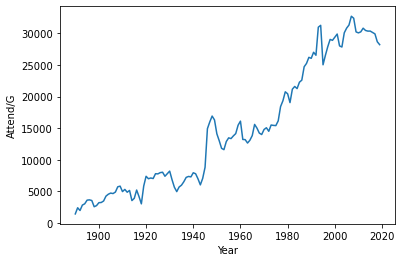

In [7]:
_ = sns.lineplot(data = misc['Attend/G'])


Attendance per game rises steadily with some periodic drops. There is a noticeable drop beginning in 2016. Is this drop predictable based on previous fluctuations? Does the attendance per game correlate with other factors such as how the game is being played or how much ticket prices cost?

### Hypothesis 1: Game Stats
Is attendance correlated to any aspect of the game played on the field?

#### Hitting Stats

In [8]:
bat_corr = bat.corr()
print(bat_corr['Attend/G'].sort_values(ascending=False).head(6))

Attend/G    1.000000
SO          0.881495
HR          0.880281
G           0.870329
#Bat        0.806018
SLG         0.638563
Name: Attend/G, dtype: float64


Attendance per game is most correlated with strikeouts and homeruns. Let's plot both over time.

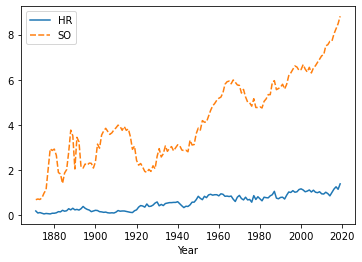

In [9]:
sns.lineplot(data = bat[['HR','SO']]);

Both strikeouts and home runs rise over time. Strikeouts look to increase steadily over time. Home runs have ups and downs over time, but rise more dramatically in recent years.

#### Pitching Stats

Next, check the corrleations for pitching stats:

In [10]:
pitch_corr = pitch.corr()
print(pitch_corr['Attend/G'].sort_values(ascending=False).head())

Attend/G    1.000000
SV          0.943824
GF          0.932778
SO9         0.901777
SO          0.900615
Name: Attend/G, dtype: float64


On the pitching side, the general rise in attendance is most correlated with saves and strikouts per 9 innings. There is also a high correlation with games finished ('GF'), but this is a less interesting stat as it does not necessariy have anything to do with the games themsevles, just how many there are.

Plot saves and strikeouts over nine innings:

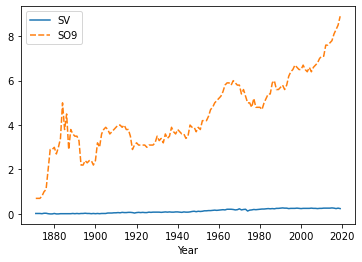

In [11]:
sns.lineplot(data = pitch[['SV', 'SO9']]);

What is going on with saves?

In [12]:
pitch['SV'].describe()

count    149.000000
mean       0.126510
std        0.092845
min        0.000000
25%        0.040000
50%        0.090000
75%        0.230000
max        0.270000
Name: SV, dtype: float64

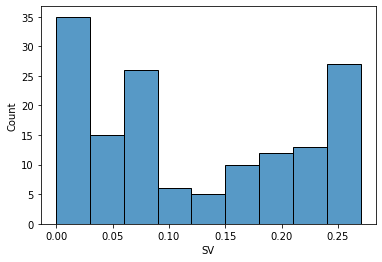

In [30]:
sns.histplot(data=pitch['SV']);

Saves were not commonly recorded until some time in the 1950s. Furthermore, there can be no more than one save in any game. Nevertheless, the rise in saves is corrlated with the rise in attendance (r = .94). 


### Hypothesis 2: Ticket Price

How have ticket prices changed over time? Plot real value to take into account the effects of inflation:

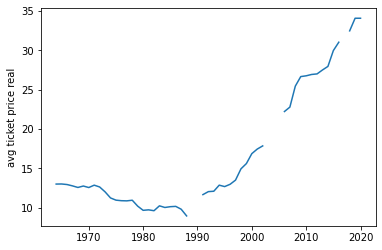

In [14]:
sns.lineplot(data=cost['avg ticket price real']);

Fill in the missing values using linear interpolation:

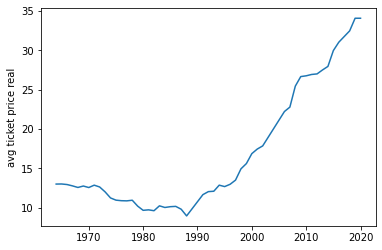

In [15]:
cost['avg ticket price real'] = cost['avg ticket price real'].interpolate()
sns.lineplot(data=cost['avg ticket price real']);

Is ticket value correlated with attendance per game?

In [16]:
cost_corr = cost.corr()
print(cost_corr['Attend/G'].sort_values(ascending=False))

Attend/G                   1.000000
avg ticket pricenominal    0.891256
salary real                0.883943
tv real                    0.858231
tv nominal                 0.854408
salary nominal             0.836556
avg ticket price real      0.625743
Name: Attend/G, dtype: float64


The correlation coefficient between attendance per game and average ticket prices is approximately .63. By convention, this is a moderate correlation, although not as high as others I have focused on.

### Hypothesis 3: Time of Game

A common hypothesis among baseball fans and media pundits is that baseball is becoming less popular because the games take too long. Next, I will take a look at how long an average game has taken over time.

Here is a a sample of average game lengths (many times are missing):

In [17]:
misc['Time'].sample(10)

Year
1923     NaN
2012    3:00
1888     NaN
1905     NaN
1929     NaN
1962    2:38
1894    2:01
1980    2:38
1911    1:57
1952    2:25
Name: Time, dtype: object

In [18]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 2019 to 1876
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tms          144 non-null    int64  
 1   G            144 non-null    int64  
 2   Time         92 non-null     object 
 3   Time/9I      91 non-null     object 
 4   Inn          112 non-null    float64
 5   Inn%         112 non-null    float64
 6   R/G          144 non-null    float64
 7   PA/G         112 non-null    float64
 8   Pitches/PA   22 non-null     float64
 9   Batters/G    112 non-null    float64
 10  Pitchers/G   112 non-null    float64
 11  PH/G         112 non-null    float64
 12  PR/G         112 non-null    float64
 13  Batters/S    112 non-null    float64
 14  Pitchers/S   112 non-null    float64
 15  Attendance   130 non-null    float64
 16  Attend/G     130 non-null    float64
 17  Lg Payroll*  49 non-null     object 
 18  Payroll/Tm*  49 non-null     object 
dtypes: f

Looking at the info for this dataframe, it appears that we need to convert strings denoting hours and minutes to timedeltas. Game times are not (usually) tracked to the second, so I will estimate to the nearest minute by adding ":00" to the end of each string. Then, convert to the type timedelta. 

In [19]:
misc['Time'] = misc['Time'] + ":00"
misc['Time'] = pd.to_timedelta(misc['Time'], errors='coerce')
misc['Time'].head()

Year
2019   0 days 03:10:00
2018   0 days 03:04:00
2017   0 days 03:08:00
2016   0 days 03:04:00
2015   0 days 03:00:00
Name: Time, dtype: timedelta64[ns]

In order to easily plot over time, I will need one number. Convert `'Time'` to `'game_time_seconds'` and plot the average over year:

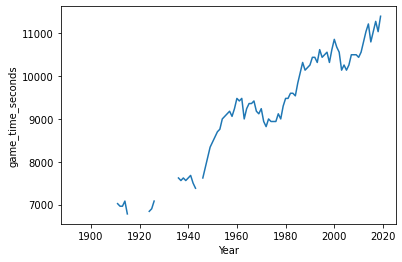

In [20]:
misc['game_time_seconds'] = misc['Time'].astype('timedelta64[s]')
sns.lineplot(data=misc['game_time_seconds']);

Interplote the missing values, again using the linear method:

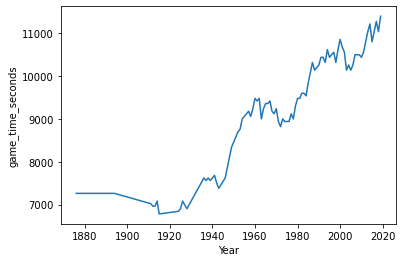

In [21]:
misc['game_time_seconds'] = misc['game_time_seconds'].interpolate()
sns.lineplot(data=misc['game_time_seconds']);

And check the correlations:

In [22]:
time_corr = misc.corr()
print(time_corr['Attend/G'].sort_values(ascending=False).head(5))

Attend/G             1.000000
Attendance           0.980177
Pitchers/G           0.951574
game_time_seconds    0.950838
Tms                  0.938924
Name: Attend/G, dtype: float64


Attendance per game is highly corrleated (r = .95) with game time. If people don't like longer games, why might this be so?

### Problem: Attendance

Can the drop in attendance be predicted, or is it an anomaly? Finally, I will prepare the data I have looked at for modeling and analysis in the next phase.

In [23]:
df = bat[['Attend/G','HR','SO']].join(pitch[['SV', 'SO9']]).join(misc['game_time_seconds'])

<AxesSubplot:>

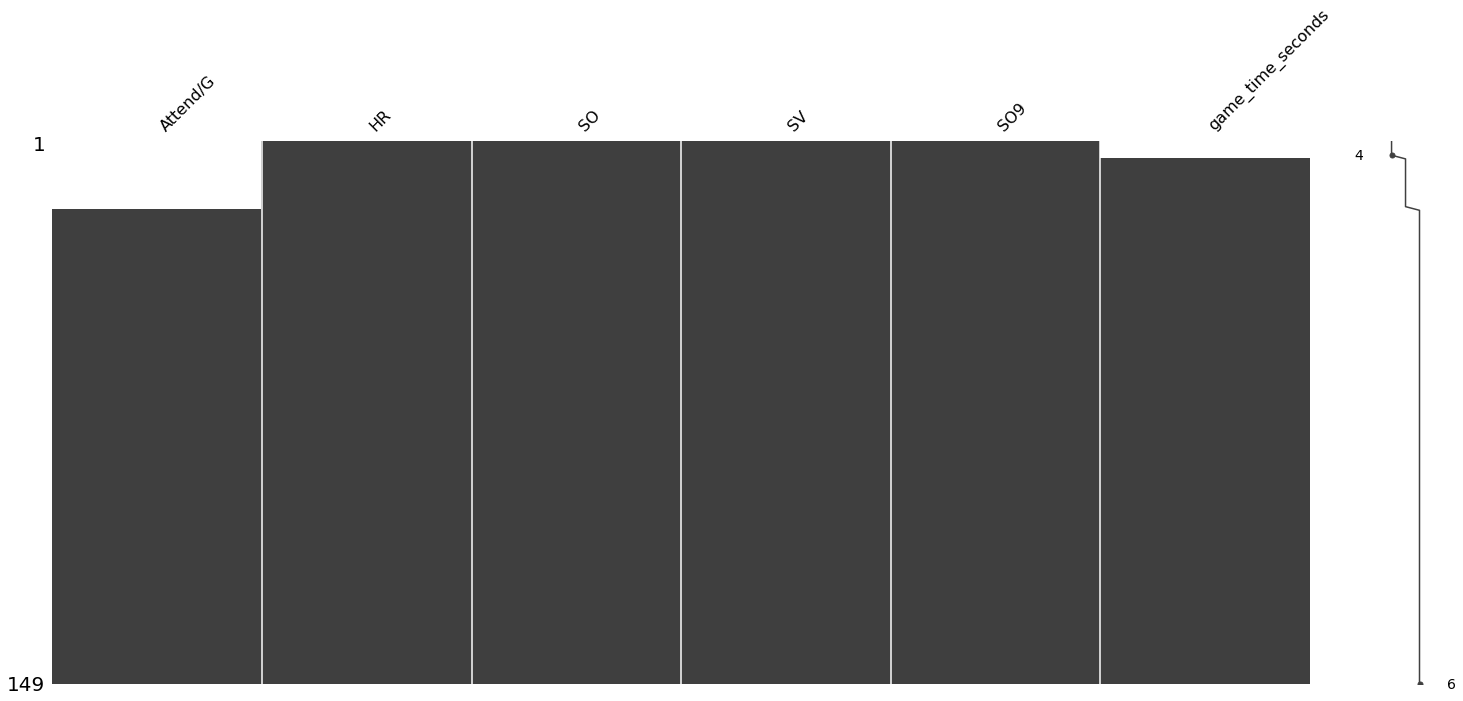

In [24]:
msno.matrix(df)

<AxesSubplot:>

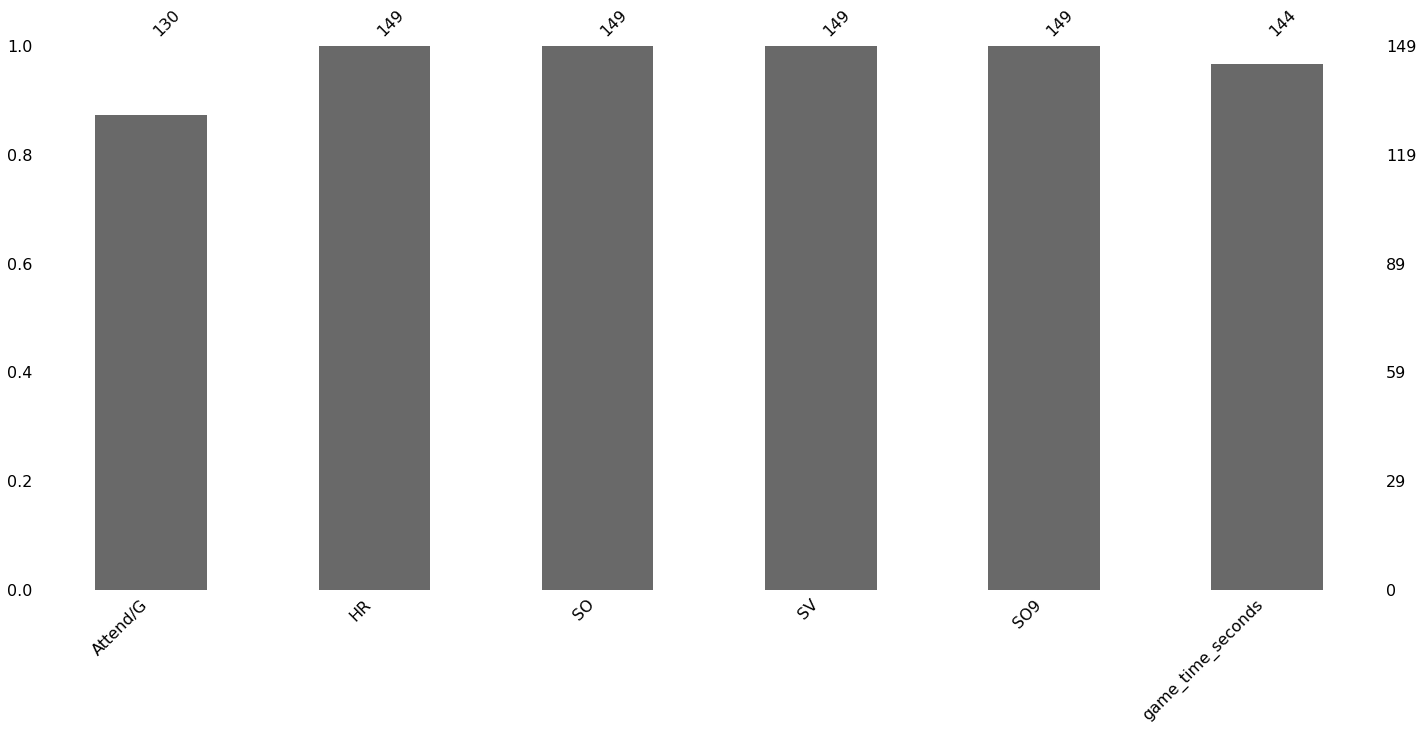

In [25]:
msno.bar(df)

In [26]:
df = df.bfill()

<AxesSubplot:>

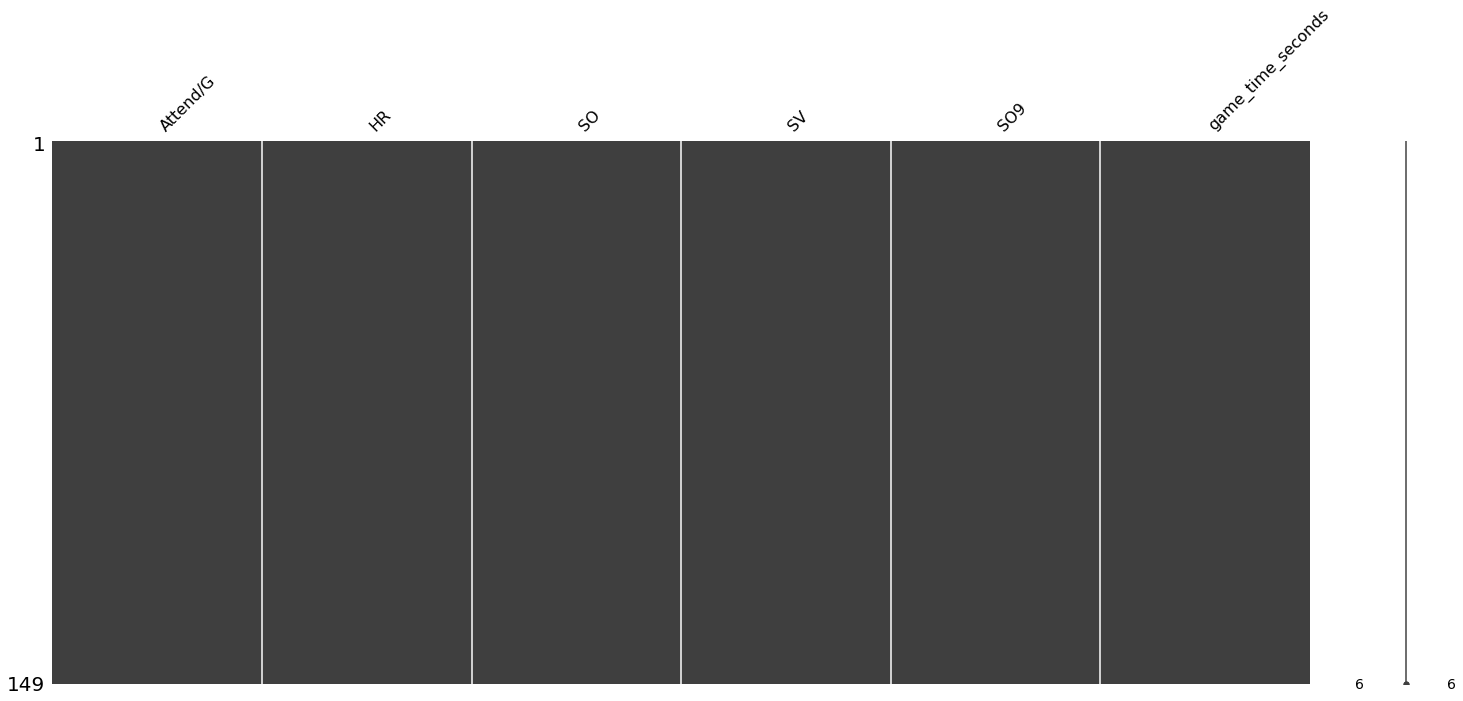

In [27]:
msno.matrix(df)

In [28]:
df.head()

,Attend/G,HR,SO,SV,SO9,game_time_seconds
Year,,,,,,
1871,1439.0,0.19,0.69,0.02,0.7,7260.0
1872,1439.0,0.10,0.72,0.02,0.7,7260.0
1873,1439.0,0.12,0.70,0.02,0.7,7260.0
1874,1439.0,0.09,0.77,0.01,0.8,7260.0
1875,1439.0,0.06,0.98,0.03,1.0,7260.0


In [29]:
df.to_csv('data/for_modeling.csv')